<img src="images/aaib.PNG" style="width:400px;height:250px;">

# About Today's Practice:

1. Content-Related: **Unsupervised ML Models: k-Means!**
\
&nbsp;
2. Customer Segmentation: Companies **divide customers into groups** with similar traits to market to each group. A business-to-business marketer may segment customers by industry, number of workers, risk level, CLV, etc.(https://www.shopify.com/blog/what-is-customer-segmentation#:~:text=Customer%20segmentation%20is%20the%20process,Number%20of%20employees)
\
&nbsp;
3. Clustering: It **divides the population or data points into groups** that are more similar than others. The goal is to cluster comparable groupings.
\
&nbsp;
4. k-Means: Unsupervised machine learning algorithms like **K-means** clustering are simple and popular. The dataset needs k centroids, which you'll define. A centroid is the cluster's center. Reducing the in-cluster sum of squares assigns each data point to a cluster. The **K-means algorithm finds k centroids and assigns each data point to the nearest cluster while keeping the centroids small.**
\
&nbsp;

![clustering image](https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png)

**The dataset uses basic mall customer data (ID, age, gender, income, spending score) to determine the Spending Score.**

# Set-up

In [12]:
# Commonly used libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# For plotting
import plotly as py
import plotly.graph_objs as go

# From hdbscan
import hdbscan

import warnings
warnings.filterwarnings('ignore')

# Data Exploration & Preprocessing

In [13]:
# loading dataset and chekcing its heads!
df = pd.read_csv('datasets/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
# checking the columns names we have
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [15]:
# checking more informaiton about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
# some stats about the dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Checking for missing values

In [17]:
# checking the total amount of missing values per column
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

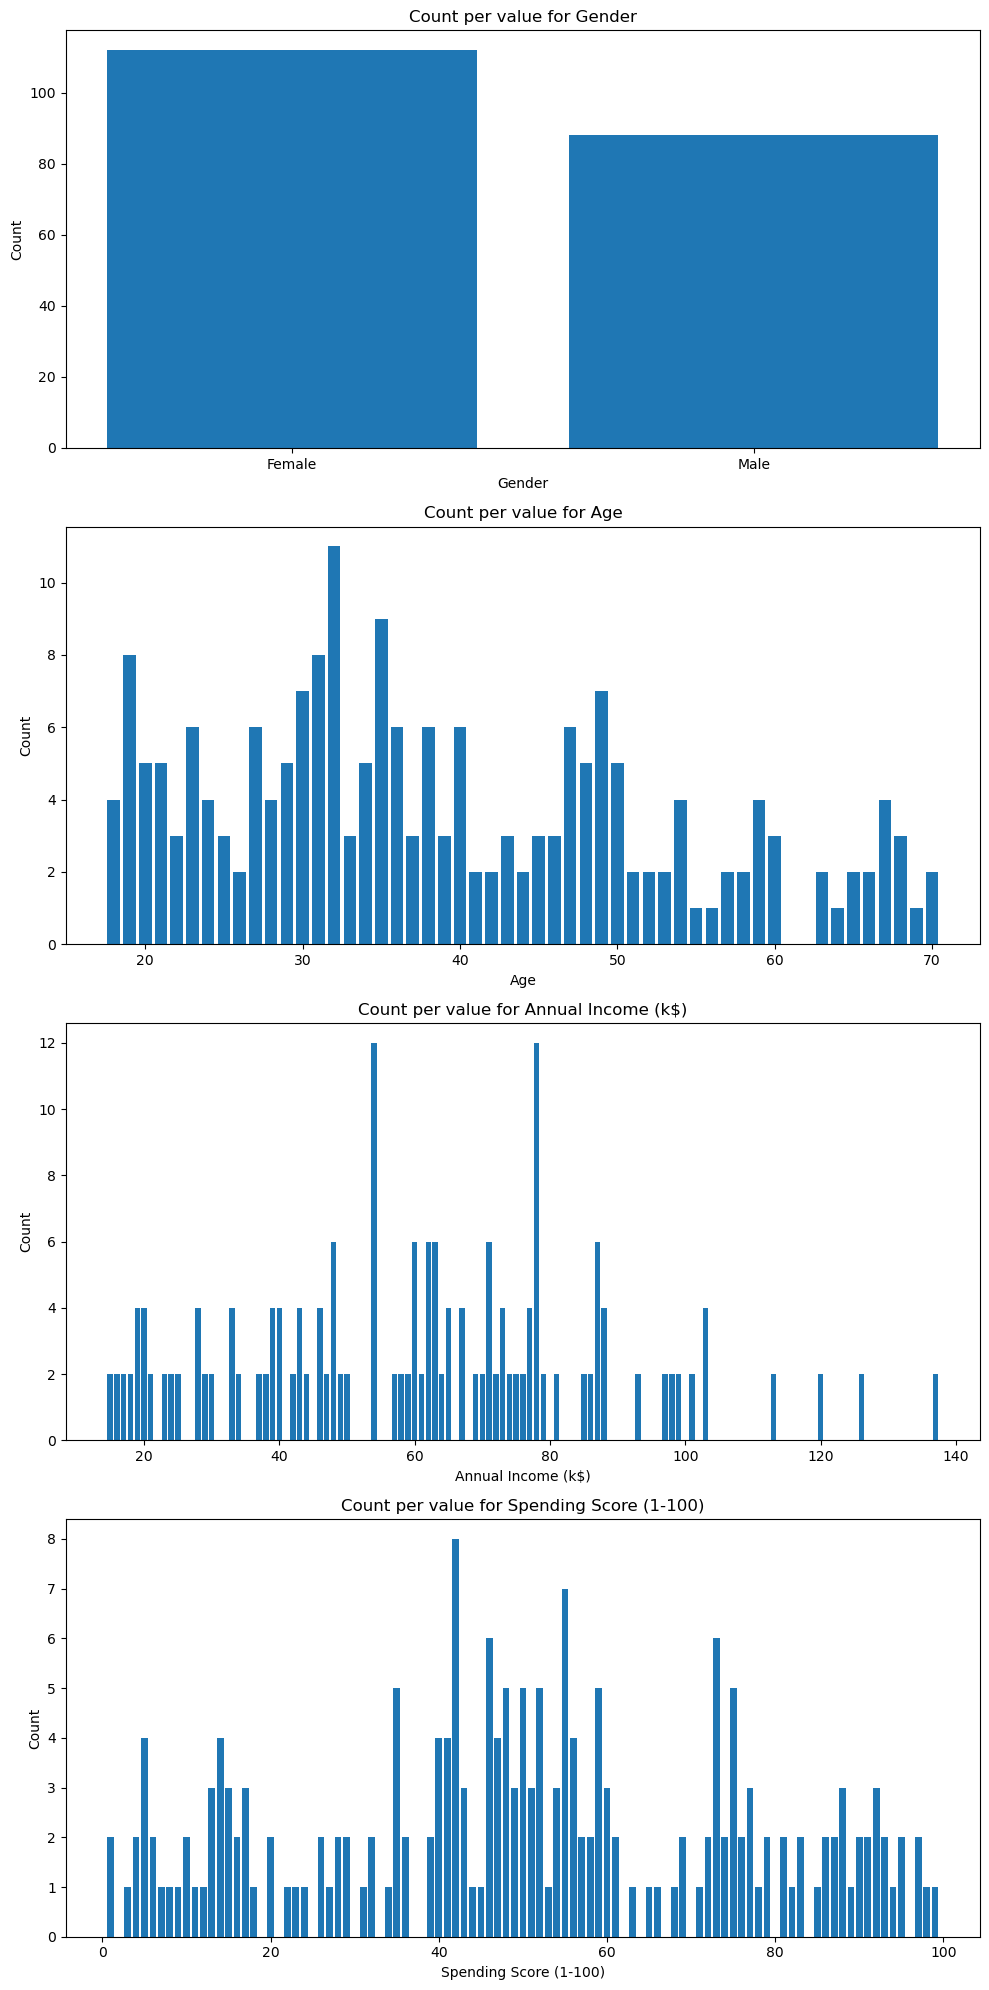

In [18]:
#ADDITIONAL EXPLORE 


# List of columns you want to plot
columns_to_plot = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Create a subplot for each column
fig, axs = plt.subplots(len(columns_to_plot), figsize=(10, 20))

for i, column in enumerate(columns_to_plot):
    # Count the frequency of each unique value in the column
    value_counts = df[column].value_counts()
    
    # Plot the frequencies
    axs[i].bar(value_counts.index, value_counts.values)
    
    # Set the title of the subplot
    axs[i].set_title(f'Count per value for {column}')
    
    # Set the x-label of the subplot
    axs[i].set_xlabel(column)
    
    # Set the y-label of the subplot
    axs[i].set_ylabel('Count')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


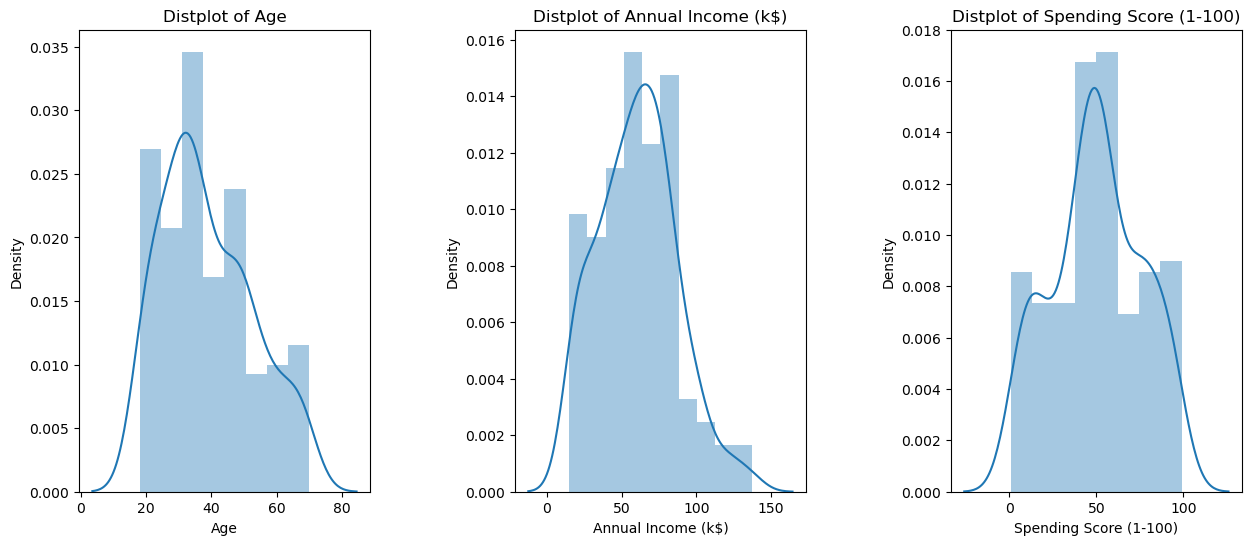

In [19]:
##ERROR-1 --> sns.distplot parameter "bin" must be a positive number, if not set will become auto, which is what I did
# ploting the histograms for the three numerical features we have and adding a density funciton over the histogram
# define figure size, number of bins and spacing between plots and bins

plt.figure(1, figsize = (15 , 6))
n = 0 
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x])
    plt.title('Distplot of {}'.format(x))
plt.show()

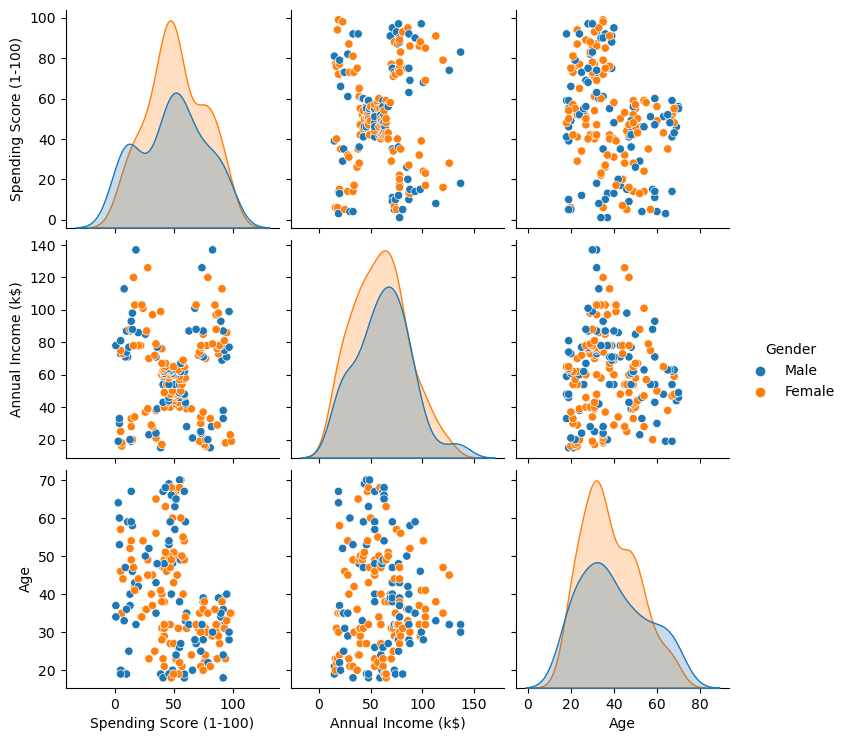

In [20]:
# pariplot to check relation between variables
sns.pairplot(df, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue = "Gender")

In [21]:
# We will cluster based on 2 and 3 variables, we will check the scatter plot, and 
# Also check elbow method to support decision on selecting value for k

# Clustering Implementation

### A1. 2D Clustering based on Age and Spending Score

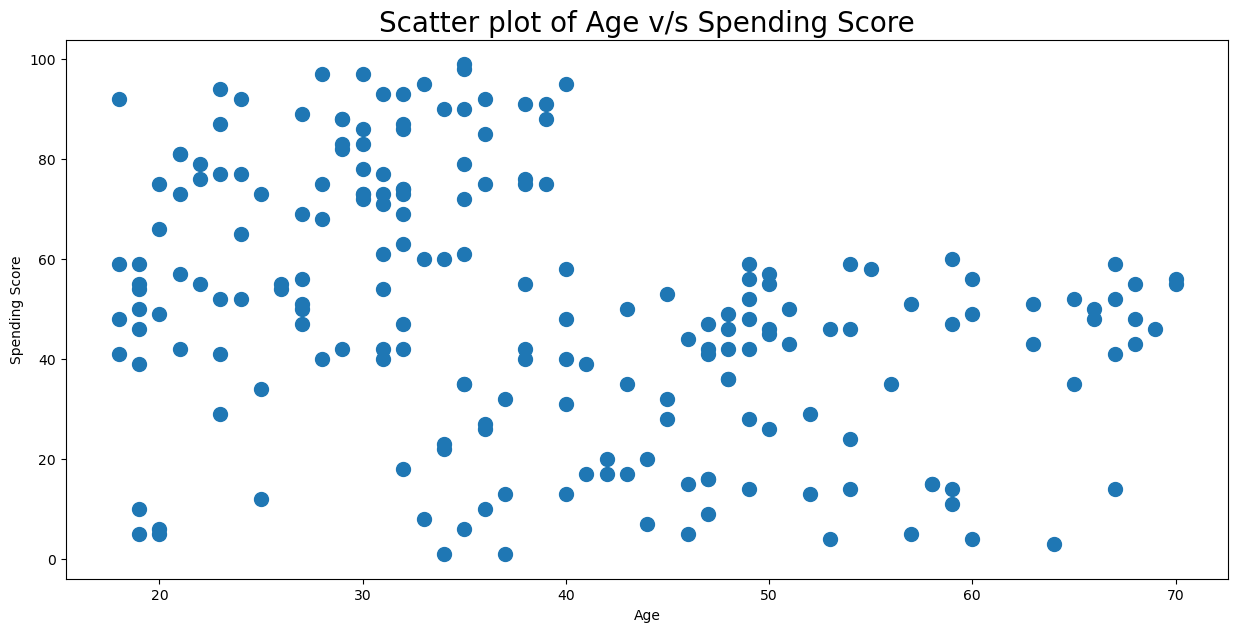

In [22]:
# This is just a scatter plot between the two variables selected in this case
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of Age v/s Spending Score', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, s = 100)
plt.show()

### A3. Implementing OPTICS using xi = 0.05

In [24]:
# Setting up the HDBSCAN algorithm and fitting the data (X1)
X1 = df[['Age', 'Spending Score (1-100)']].iloc[: , :].values
# Parameters for OPTICS
min_samples = 2
xi = 0.05
min_cluster_size = 0.1

# Instantiate the OPTICS model
optics_model = OPTICS(min_samples=min_samples, xi=xi, min_cluster_size=min_cluster_size)

# Fit the model
optics_model.fit(X1)

OPTICS(min_cluster_size=0.1, min_samples=2)

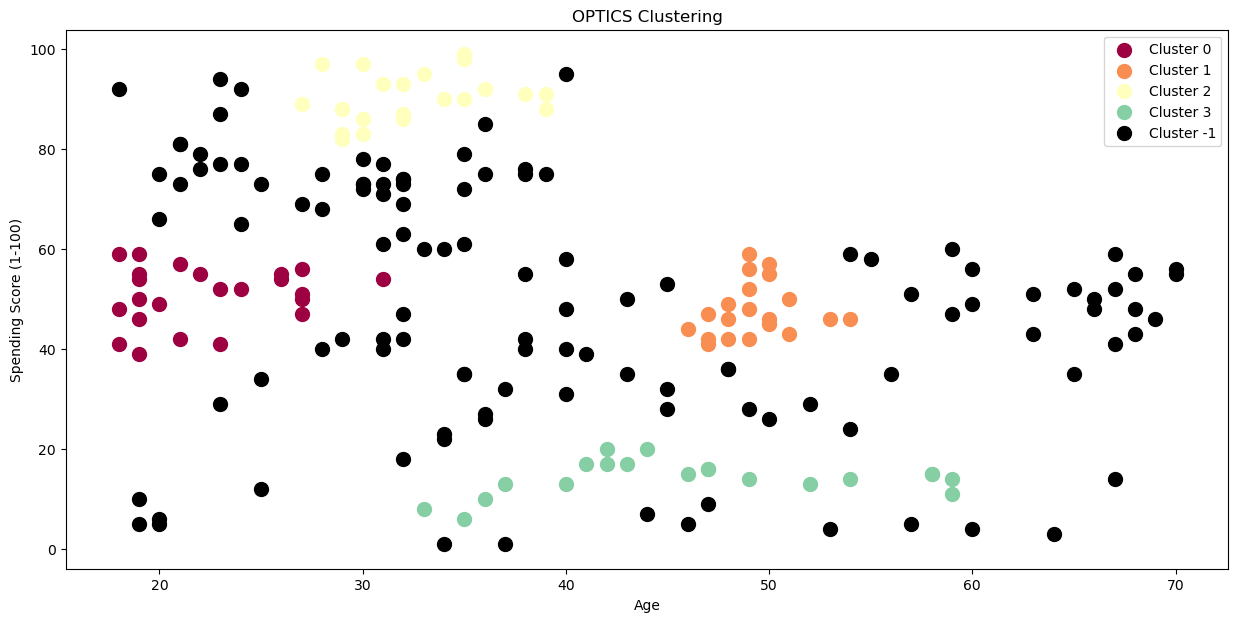

In [26]:
# Get cluster labels
labels = optics_model.labels_

# Plotting the results
plt.figure(1, figsize=(15, 7))
plt.clf()

# Unique labels for the clusters (including noise points)
unique_labels = set(labels)

# Colors for each cluster (and noise)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# Plot the OPTICS cluster results
for label, col in zip(unique_labels, colors):
    if label == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == label)
    xy = X1[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=100, c=[col], label=f'Cluster {label}')

plt.ylabel('Spending Score (1-100)')
plt.xlabel('Age')
plt.title('OPTICS Clustering')
plt.legend()
plt.show()

### A3. Implementing OPTICS using xi = 0.1

In [27]:
# Setting up the HDBSCAN algorithm and fitting the data (X1)
X1 = df[['Age', 'Spending Score (1-100)']].iloc[: , :].values
# Parameters for OPTICS
min_samples = 2
xi = 0.1
min_cluster_size = 0.1

# Instantiate the OPTICS model
optics_model = OPTICS(min_samples=min_samples, xi=xi, min_cluster_size=min_cluster_size)

# Fit the model
optics_model.fit(X1)

OPTICS(min_cluster_size=0.1, min_samples=2, xi=0.1)

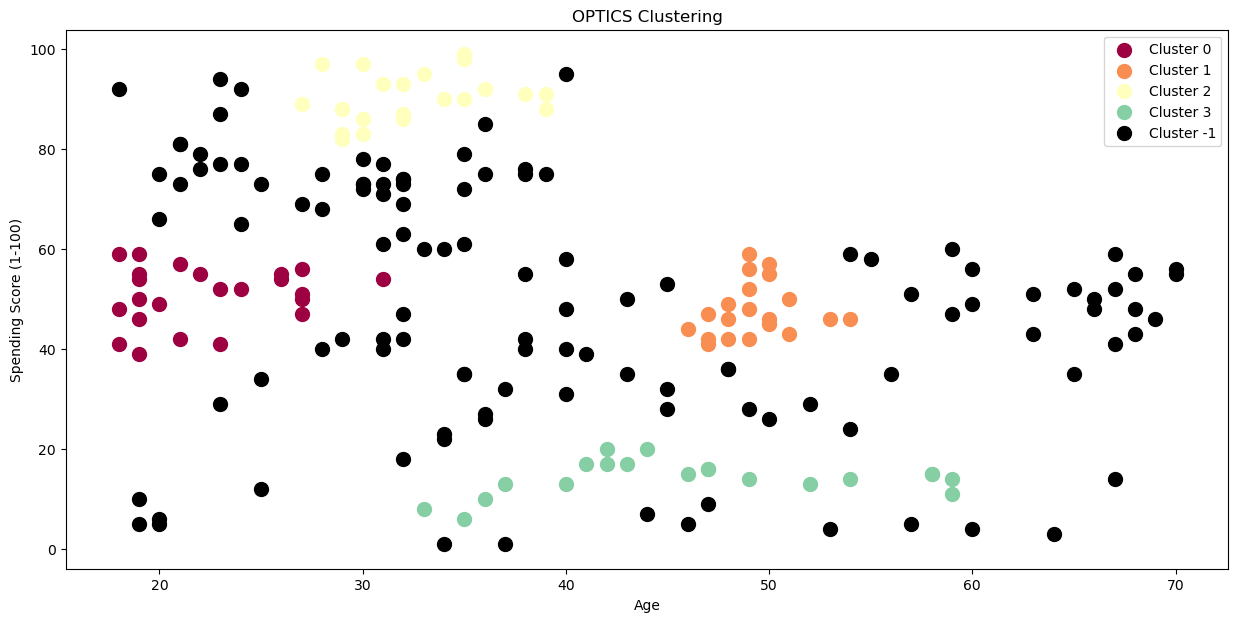

In [28]:
# Get cluster labels
labels = optics_model.labels_

# Plotting the results
plt.figure(1, figsize=(15, 7))
plt.clf()

# Unique labels for the clusters (including noise points)
unique_labels = set(labels)

# Colors for each cluster (and noise)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# Plot the OPTICS cluster results
for label, col in zip(unique_labels, colors):
    if label == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == label)
    xy = X1[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=100, c=[col], label=f'Cluster {label}')

plt.ylabel('Spending Score (1-100)')
plt.xlabel('Age')
plt.title('OPTICS Clustering')
plt.legend()
plt.show()

### B1. 2D Clustering based on Annual Income and Spending Score

In [32]:
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
# Parameters for OPTICS
min_samples = 2
xi = 0.05
min_cluster_size = 0.1

# Instantiate the OPTICS model
optics_model = OPTICS(min_samples=min_samples, xi=xi, min_cluster_size=min_cluster_size)

# Fit the model
optics_model.fit(X1)

OPTICS(min_cluster_size=0.1, min_samples=2)

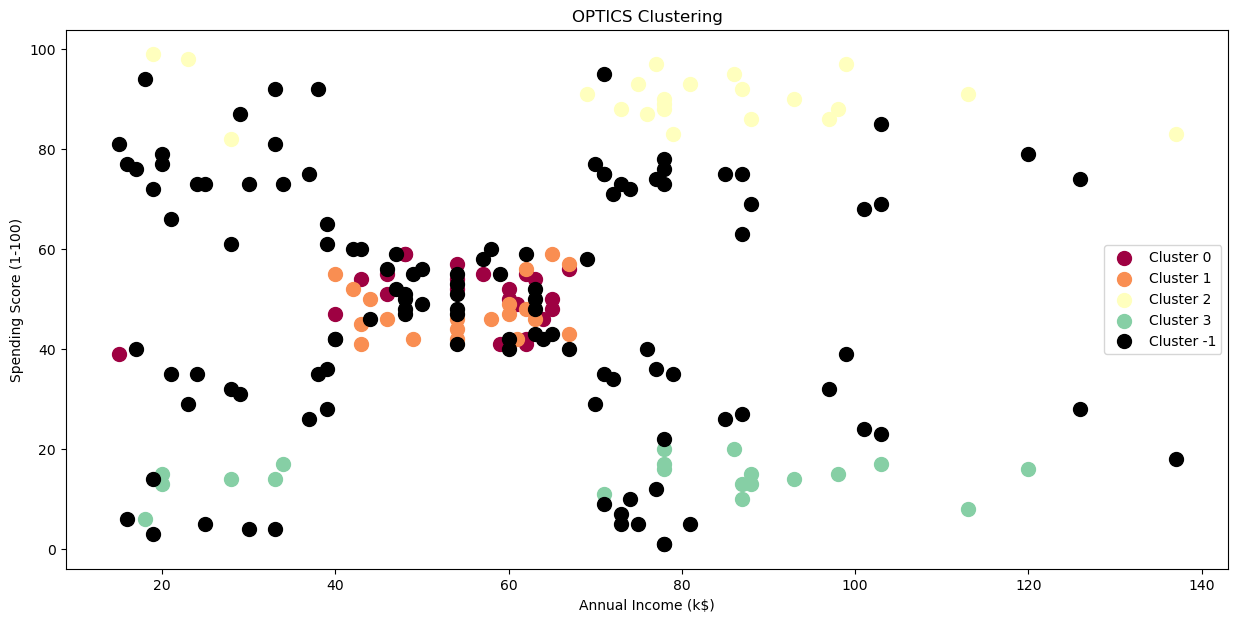

In [33]:
# Get cluster labels
labels = optics_model.labels_

# Plotting the results
plt.figure(1, figsize=(15, 7))
plt.clf()

# Unique labels for the clusters (including noise points)
unique_labels = set(labels)

# Colors for each cluster (and noise)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# Plot the OPTICS cluster results
for label, col in zip(unique_labels, colors):
    if label == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == label)
    xy = X2[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=100, c=[col], label=f'Cluster {label}')

plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.title('OPTICS Clustering')
plt.legend()
plt.show()

### C1. 3D Clustering based on Age, Annual Income and Spending Score

In [35]:
#Train the models
X3 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[: , :].values
# Parameters for OPTICS
min_samples = 2
xi = 0.05
min_cluster_size = 0.1

# Instantiate the OPTICS model
optics_model = OPTICS(min_samples=min_samples, xi=xi, min_cluster_size=min_cluster_size)

# Fit the model
optics_model.fit(X3)

OPTICS(min_cluster_size=0.1, min_samples=2)

In [37]:
labels = optics_model.labels_
# Adding the cluster labels to the DataFrame
df['cluster'] = labels3

# Display the first few rows of the DataFrame
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   cluster  
0       -1  
1       -1  
2       -1  
3       -1  
4       -1  


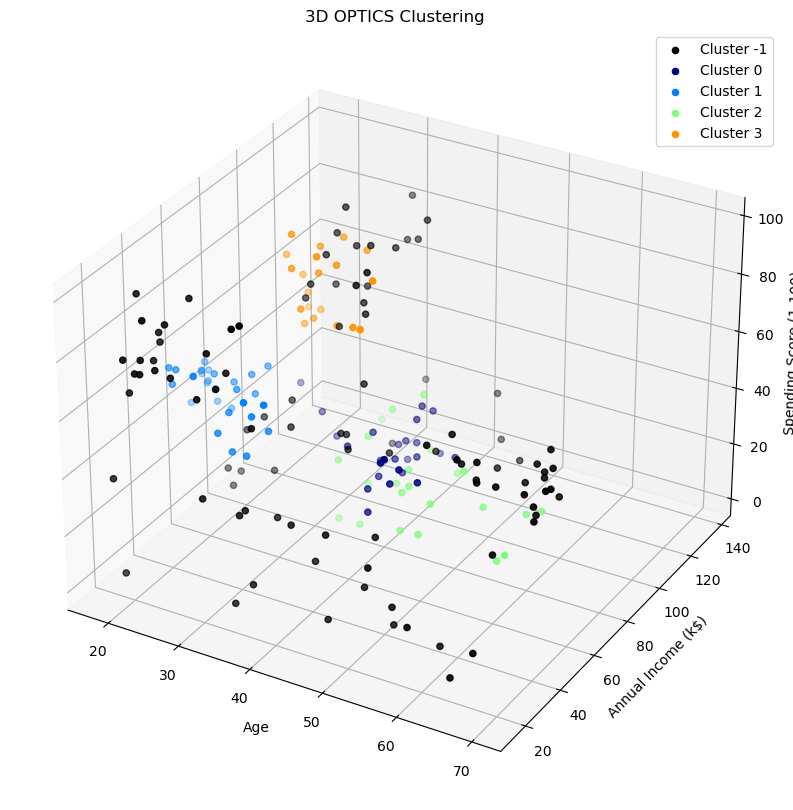

In [41]:
# Plotting the 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot points colored by cluster labels
for label in np.unique(labels):
    if label == -1:
        # Noise points (label == -1) will be plotted in black
        color = 'k'
    else:
        color = plt.cm.jet(label / np.max(labels + 1))  # Color map for clusters
    ax.scatter(X3[labels == label, 0], X3[labels == label, 1], X3[labels == label, 2], color=color, label=f'Cluster {label}')

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D OPTICS Clustering')

# Show legend
ax.legend()

# Show plot
plt.show()

In [42]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,-1
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,-1
4,5,Female,31,17,40,-1


In [43]:
#Export the result
df.to_excel("datasets/customers_segmented_final_OPTICS.xlsx", index = False)

In [46]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Extract Descriptive Statistics
# Group by the cluster labels
grouped = df.groupby('cluster')

# Calculate descriptive statistics for each cluster
descriptive_stats = grouped.describe()

# Display the descriptive statistics
print(descriptive_stats)


        CustomerID                                                       \
             count        mean        std    min     25%    50%     75%   
cluster                                                                   
-1           103.0   87.058252  66.440866    1.0   26.50   73.0  144.00   
 0            26.0   82.115385  22.867141   43.0   61.75   83.0   98.50   
 1            28.0   81.107143  25.314817   44.0   57.50   82.0  101.75   
 2            23.0  163.782609  18.297930  129.0  152.00  167.0  178.00   
 3            20.0  148.000000  13.533584  126.0  137.50  147.0  158.50   

                  Age                                                       \
           max  count       mean        std   min   25%   50%    75%   max   
cluster                                                                      
-1       200.0  103.0  40.747573  15.987568  18.0  28.5  36.0  54.50  70.0   
 0       120.0   26.0  47.423077   4.437775  34.0  47.0  48.5  50.00  54.0   
 1       